### Libraries


In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read CSV file

In [2]:
# Read CSV file
df1 = pd.read_csv("DIT_Channel.csv")

# Make a copy
df = df1.copy()

# Print result
df

,channel_id,monitor_radio_id,posted_data_id,location_id,channel,transmission_rate,noise,contention,frames_total,frames_data,...,survey_dump_transmit_time,rss_40,rss_50,rss_60,rss_70,rss_80,rss_90,mean_interframe,var_interframe,created_at
0,27366122,1122,43469381,371,11,1.0,0.0,1.1703,3848,72,...,NaN,0,0,0,2,13,2,5.584,69.621,2018-05-02 00:05:56
1,27366333,1122,43469601,371,5,1.0,0.0,1.0099,849,30,...,NaN,0,0,0,0,4,0,33.601,572.944,2018-05-02 00:10:07
2,27366397,1122,43469681,371,7,1.0,0.0,1.0024,442,3,...,NaN,0,0,0,0,3,0,66.456,2460.919,2018-05-02 00:11:17
3,27366427,1122,43469711,371,8,1.0,0.0,1.0218,908,51,...,NaN,0,0,0,0,2,0,31.350,917.026,2018-05-02 00:11:52
4,27367632,1122,43471051,371,8,1.0,0.0,1.0135,674,26,...,NaN,0,0,0,0,2,0,42.508,1343.347,2018-05-02 00:35:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435004,29294976,1160,45593411,378,9,10.8,0.0,1.0853,8413,4265,...,NaN,2,0,0,4,9,0,3.851,61.973,2018-05-30 10:54:47
435005,29294999,1160,45593446,378,10,1.0,0.0,1.0136,1770,243,...,NaN,0,0,0,0,13,1,18.503,563.282,2018-05-30 10:55:24
435006,29295026,1160,45593475,378,11,1.0,0.0,1.0506,3278,246,...,NaN,0,0,0,0,16,7,7.582,113.351,2018-05-30 10:56:00
435007,29295051,1160,45593500,378,12,1.0,0.0,1.0587,1649,388,...,NaN,0,0,0,0,14,0,16.983,563.543,2018-05-30 10:56:36


### Time selection
* For example: Mornings (7h-15h) of the days 2018-05-21, 2018-05-22, 2018-05-23, 2018-05-24 and 2018-05-25

In [3]:
# Data selection (Mornings)
df = df[((df['created_at'] > '2018-05-21 07:00:00') & (df['created_at'] <= '2018-05-21 15:00:00')) |
((df['created_at'] > '2018-05-22 07:00:00') & (df['created_at'] <= '2018-05-22 15:00:00')) |
((df['created_at'] > '2018-05-23 07:00:00') & (df['created_at'] <= '2018-05-23 15:00:00')) |
((df['created_at'] > '2018-05-24 07:00:00') & (df['created_at'] <= '2018-05-24 15:00:00')) |
((df['created_at'] > '2018-05-25 07:00:00') & (df['created_at'] <= '2018-05-25 15:00:00'))]

# Print result
df

,channel_id,monitor_radio_id,posted_data_id,location_id,channel,transmission_rate,noise,contention,frames_total,frames_data,...,survey_dump_transmit_time,rss_40,rss_50,rss_60,rss_70,rss_80,rss_90,mean_interframe,var_interframe,created_at
16485,28703611,1122,44949990,371,13,0.0,0.0,1.0172,481,0,...,NaN,0,0,0,2,4,2,61.568,5380.747,2018-05-21 07:00:22
16486,28703646,1122,44950035,371,1,3.3,0.0,1.0703,1924,165,...,NaN,0,0,0,1,11,3,14.531,448.625,2018-05-21 07:00:57
16487,28703681,1122,44950071,371,2,1.0,0.0,1.0126,1133,19,...,NaN,0,0,0,3,6,0,24.611,551.214,2018-05-21 07:01:32
16488,28703709,1122,44950100,371,3,1.0,0.0,1.0060,1209,572,...,NaN,0,0,0,1,3,0,23.233,789.327,2018-05-21 07:02:07
16489,28703745,1122,44950138,371,4,1.0,0.0,1.0123,1156,86,...,NaN,0,0,0,0,4,0,24.451,883.831,2018-05-21 07:02:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427307,29021254,1160,45295628,378,9,7.4,0.0,1.0268,2803,508,...,NaN,2,0,0,5,10,0,9.868,173.649,2018-05-25 14:57:12
427308,29021277,1160,45295651,378,10,1.0,0.0,1.0584,2089,43,...,NaN,0,0,0,3,15,2,12.261,436.213,2018-05-25 14:57:48
427309,29021302,1160,45295677,378,11,1.0,0.0,1.0897,3203,183,...,NaN,0,0,0,2,16,3,7.321,124.883,2018-05-25 14:58:23
427310,29021330,1160,45295705,378,12,1.0,0.0,1.0619,1977,128,...,NaN,0,0,0,5,8,1,15.395,509.285,2018-05-25 14:58:59


### Location based
* For example the academic building

In [4]:
# Location: Academic building
#df = df[(df['monitor_radio_id'] == 1122) |
#(df['monitor_radio_id'] == 1123) |
#(df['monitor_radio_id'] == 1126) |
#(df['monitor_radio_id'] == 1127) |
#(df['monitor_radio_id'] == 1136) |
#(df['monitor_radio_id'] == 1137) |
#(df['monitor_radio_id'] == 1138) |
#(df['monitor_radio_id'] == 1139) ]

# Print result
#df

,channel_id,monitor_radio_id,posted_data_id,location_id,channel,transmission_rate,noise,contention,frames_total,frames_data,...,survey_dump_transmit_time,rss_40,rss_50,rss_60,rss_70,rss_80,rss_90,mean_interframe,var_interframe,created_at
16485,28703611,1122,44949990,371,13,0.0,0.0,1.0172,481,0,...,NaN,0,0,0,2,4,2,61.568,5380.747,2018-05-21 07:00:22
16486,28703646,1122,44950035,371,1,3.3,0.0,1.0703,1924,165,...,NaN,0,0,0,1,11,3,14.531,448.625,2018-05-21 07:00:57
16487,28703681,1122,44950071,371,2,1.0,0.0,1.0126,1133,19,...,NaN,0,0,0,3,6,0,24.611,551.214,2018-05-21 07:01:32
16488,28703709,1122,44950100,371,3,1.0,0.0,1.0060,1209,572,...,NaN,0,0,0,1,3,0,23.233,789.327,2018-05-21 07:02:07
16489,28703745,1122,44950138,371,4,1.0,0.0,1.0123,1156,86,...,NaN,0,0,0,0,4,0,24.451,883.831,2018-05-21 07:02:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300745,29021255,1139,45295629,370,2,1.0,0.0,1.0589,1878,31,...,NaN,0,0,0,3,15,0,14.354,317.544,2018-05-25 14:57:12
300746,29021276,1139,45295650,370,3,1.2,0.0,1.0197,6336,39,...,NaN,0,0,0,3,8,0,5.600,94.000,2018-05-25 14:57:47
300747,29021301,1139,45295676,370,4,1.1,0.0,1.0142,857,38,...,NaN,0,0,0,1,6,1,37.484,2408.871,2018-05-25 14:58:22
300748,29021328,1139,45295703,370,5,1.3,0.0,1.0239,3385,86,...,NaN,0,0,2,1,3,1,11.494,481.447,2018-05-25 14:58:57


### Drop columns


In [5]:
# Drop unnecessary data
df.drop(labels=["channel_id","monitor_radio_id","posted_data_id","location_id","channel","transmission_rate","noise","contention","frames_total",
"frames_data","frames_mgnt","frames_ctrl","frames_fail","frames_fail_bad","bw_busy_native","bw_busy_qc_native","bw_busy_qc_ext","bw_idle","bw_fail",
"bw_access_max_ap","bw_access_avg_ap","bw_free_calculated","bw_data","bw_mgnt","bw_ctrl","bw_ap","bw_client","bw_adhoc","bw_mesh",
"bw_unassociated_clients", "infrastructure_aps","infrastructure_clients","unassociated_clients","adhoc_networks","adhoc_devices","mesh_networks",
"mesh_devices","hidden_devices","hidden_aps","hidden_clients","hidden_adhoc_devices","hidden_mesh_devices","clients_channel","aps_channel",
"aps_rss_combined","aps_rss_factor","survey_dump_noise","survey_dump_active_time","survey_dump_busy_time","survey_dump_receive_time",
"survey_dump_transmit_time","rss_40","rss_50","rss_60","rss_70","rss_80","rss_90","mean_interframe","var_interframe"], axis=1, inplace=True)

# Print results
df

C:\Users\alvar\AppData\Local\Temp\ipykernel_10296\2950767238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(labels=["channel_id","monitor_radio_id","posted_data_id","location_id","channel","transmission_rate","noise","contention","frames_total",


,bw_busy,total_devices,created_at
16485,0.0267,18,2018-05-21 07:00:22
16486,0.1119,26,2018-05-21 07:00:57
16487,0.0788,17,2018-05-21 07:01:32
16488,0.0768,11,2018-05-21 07:02:07
16489,0.0741,16,2018-05-21 07:02:42
...,...,...,...
300745,0.1183,38,2018-05-25 14:57:12
300746,0.0769,37,2018-05-25 14:57:47
300747,0.0439,25,2018-05-25 14:58:22
300748,0.0589,26,2018-05-25 14:58:57


### Drop NaN columns
* "how" --> Determine if row or column is removed from DataFrame, when we have at least one NA or all NA:
    * ‘any’ : If any NA values are present, drop that row or column.
    * ‘all’ : If all values are NA, drop that row or column.

In [6]:
# Drop columns with NaN data
df.dropna(axis=1, how='any', inplace=True)

#Print result
df

C:\Users\alvar\AppData\Local\Temp\ipykernel_10296\201013269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=1, how='any', inplace=True)


,bw_busy,total_devices,created_at
16485,0.0267,18,2018-05-21 07:00:22
16486,0.1119,26,2018-05-21 07:00:57
16487,0.0788,17,2018-05-21 07:01:32
16488,0.0768,11,2018-05-21 07:02:07
16489,0.0741,16,2018-05-21 07:02:42
...,...,...,...
300745,0.1183,38,2018-05-25 14:57:12
300746,0.0769,37,2018-05-25 14:57:47
300747,0.0439,25,2018-05-25 14:58:22
300748,0.0589,26,2018-05-25 14:58:57


### Remove categorical data


In [7]:
# Save TimeStamp
dates = df["created_at"]

# Drop categorical data
df.drop(labels=['created_at'], axis=1, inplace=True)

# Print result
df

C:\Users\alvar\AppData\Local\Temp\ipykernel_10296\1753502878.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(labels=['created_at'], axis=1, inplace=True)


,bw_busy,total_devices
16485,0.0267,18
16486,0.1119,26
16487,0.0788,17
16488,0.0768,11
16489,0.0741,16
...,...,...
300745,0.1183,38
300746,0.0769,37
300747,0.0439,25
300748,0.0589,26


### Elbow method

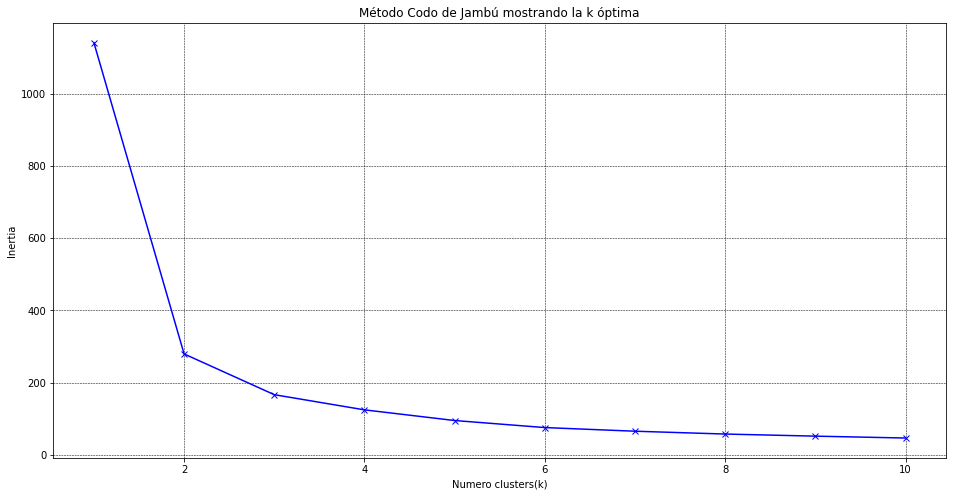

In [8]:
# Normalize data
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
normalize = min_max_scaler.fit_transform(df)
df_normalize = pd.DataFrame(normalize)

# Rename
df_normalize = df_normalize.rename(columns={0: 'bw_busy', 1: 'total_devices'})

# Elbow method
inertia = [] 
rango = range(1,11)
for i in rango:
    algoritmo = KMeans(n_clusters=i) #default: init = k-means++, n_init = 10, max_iter = 300
    algoritmo.fit(df_normalize)
    inertia.append(algoritmo.inertia_) #Calculate: The total sum of the square inside each cluster

# Size figure
plt.figure(figsize=(16,8))

# Plot
plt.plot(rango, inertia, 'bx-')
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.xlabel('Numero clusters(k)')
plt.ylabel('Inertia')
plt.title('Método Codo de Jambú mostrando la k óptima')

# Print plt
plt.show()

### k-means from sklearn
* With the Elbow method we obtain the optimal k is 3

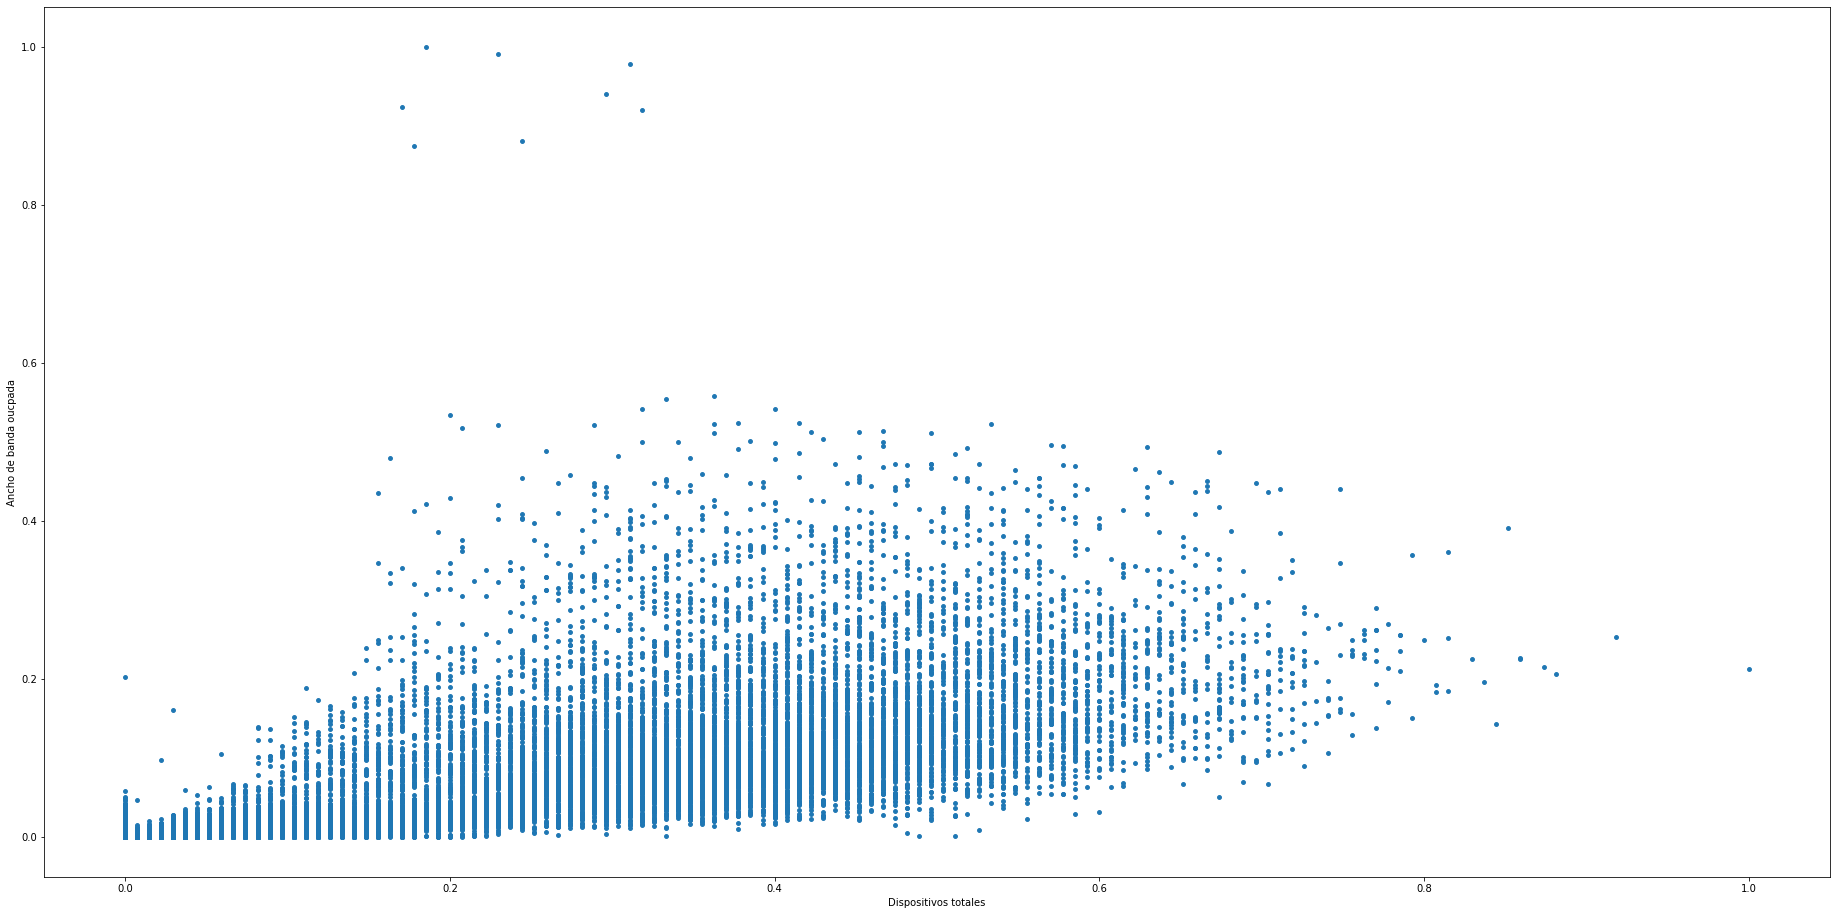

In [9]:
# Number of clusters
k = 3

# Kmeans
kmeans = KMeans(n_clusters= k) #default: init = k-means++, n_init = 10, max_iter = 300

# Labels of data
cluster = kmeans.fit_predict(df_normalize)

# Obtain centroids coordinates
centroids = kmeans.cluster_centers_

# Asign x and y
x = df_normalize['total_devices'].values
y = df_normalize['bw_busy'].values

# Print result
plt.figure(figsize=(32,16))
plt.xlabel('Dispositivos totales')
plt.ylabel('Ancho de banda oucpada')
plt.scatter(x,y, marker='.', s=60)

### Graphic representation of k-means clusters

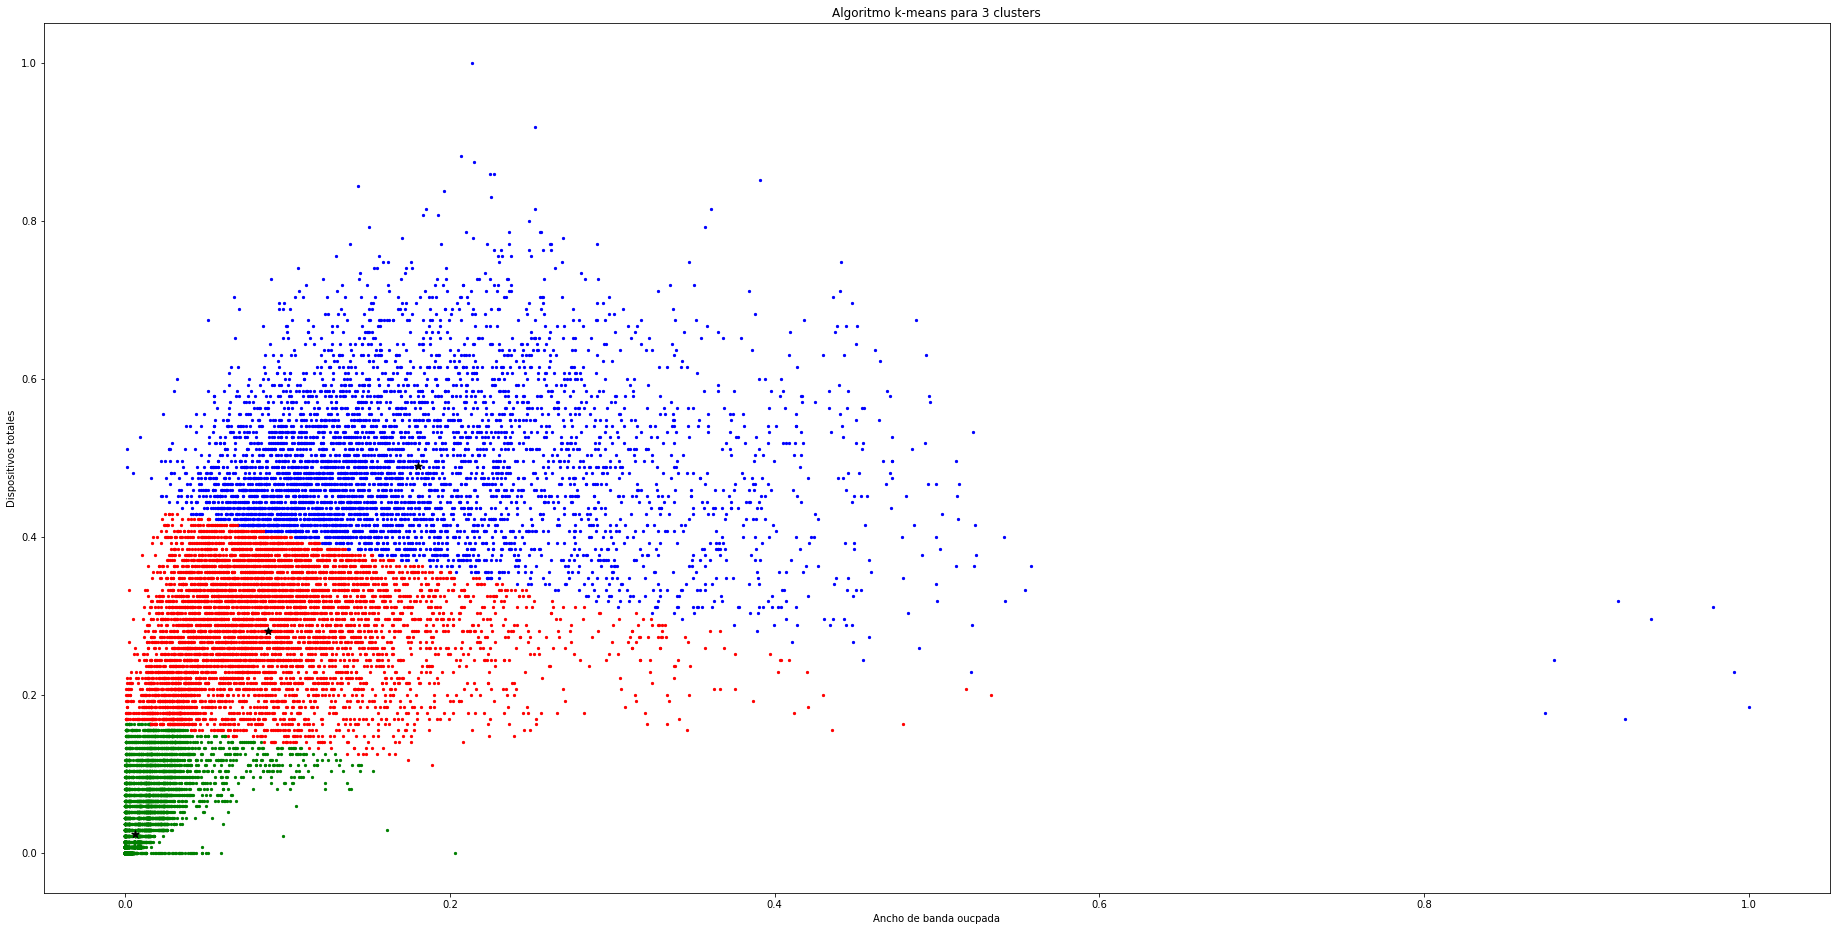

In [10]:
# Asign colors to clusters
colors = ['red', 'green', 'blue', 'yellow'] #Number of colors = k
asign = []
for row in cluster:
    asign.append(colors[row])

# Plot size
plt.figure(figsize=(32,16))

# Plot scatter
plt.scatter(df_normalize.iloc[cluster == 0, 0], df_normalize.iloc[cluster == 0, 1], s = 5, c = "green" )
plt.scatter(df_normalize.iloc[cluster == 1, 0], df_normalize.iloc[cluster == 1, 1], s = 5, c = "blue" )
plt.scatter(df_normalize.iloc[cluster == 2, 0], df_normalize.iloc[cluster == 2, 1], s = 5, c = "red" )
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=60)

# Titles of x, y and plot
plt.xlabel('Ancho de banda oucpada')
plt.ylabel('Dispositivos totales')
plt.title('Algoritmo k-means para '+str(k)+' clusters')

# Show plot
plt.show()


### Repeat but simplifying how to show data

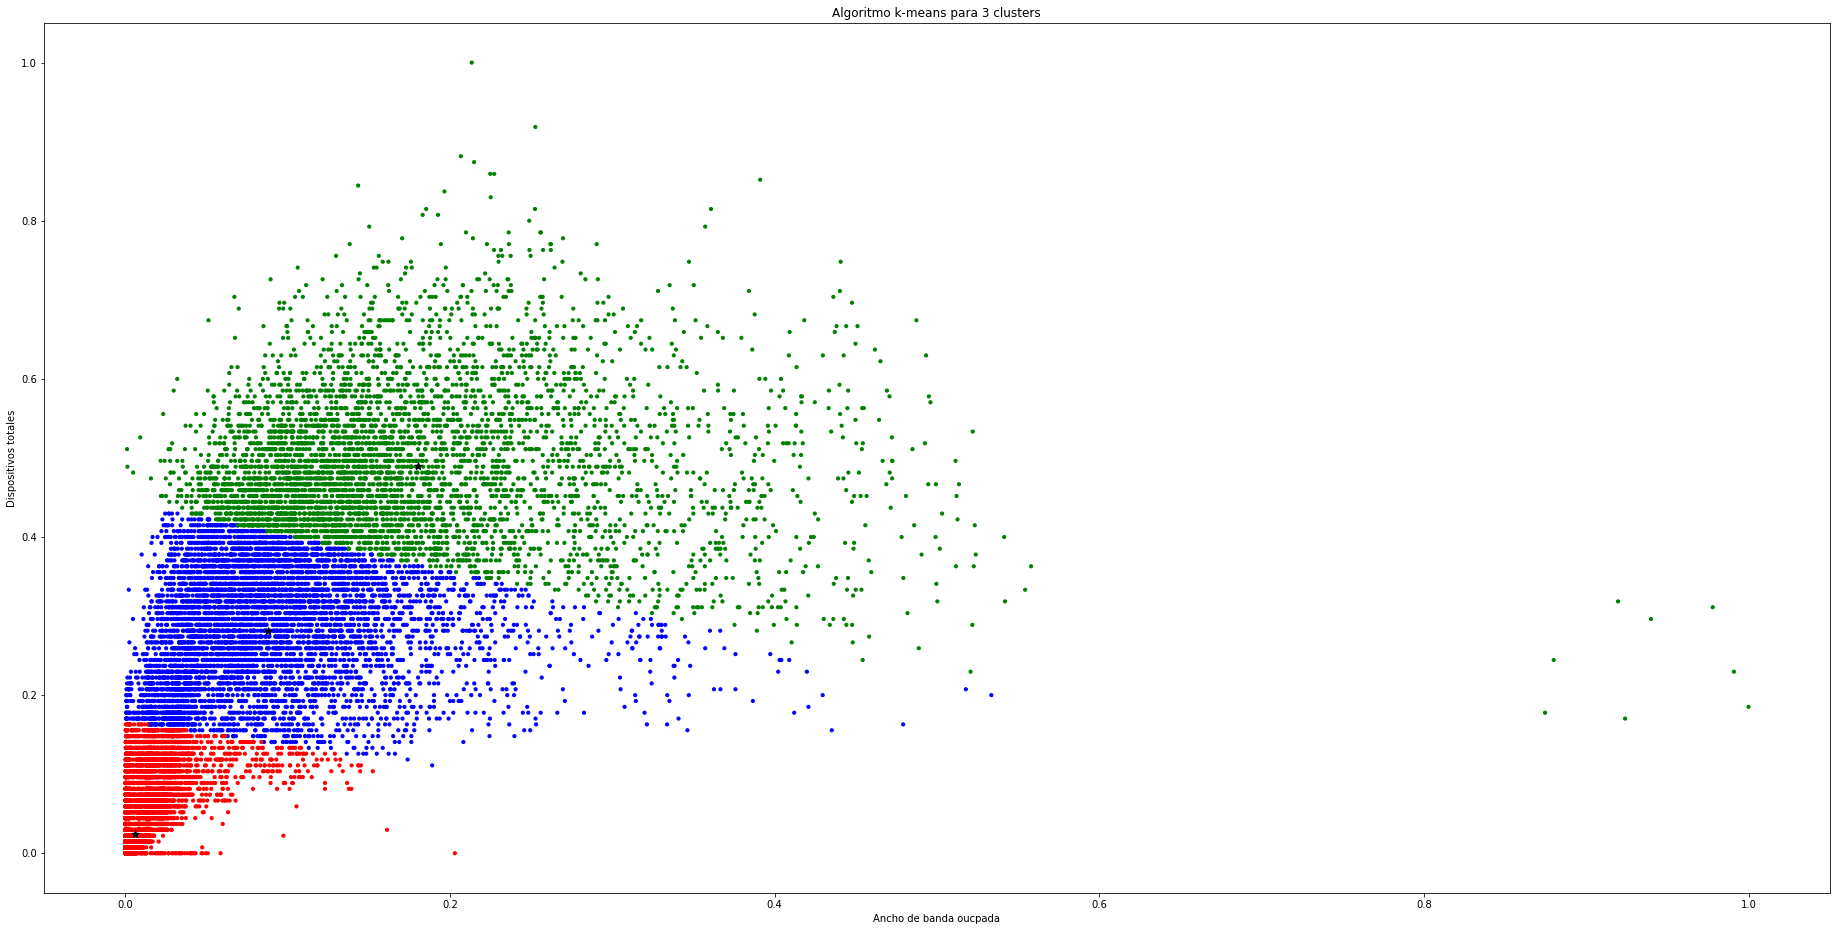

In [11]:
# Asign colors to clusters
colors = ['red', 'green', 'blue', 'yellow'] #Number of colors = k
asign = []
for row in cluster:
    asign.append(colors[row])

# Plot size
plt.figure(figsize=(32,16))

# Plot scatter
plt.scatter(y, x, marker='.', c = asign, s=40)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=60)

# Titles of x, y and plot
plt.xlabel('Ancho de banda oucpada')
plt.ylabel('Dispositivos totales')
plt.title('Algoritmo k-means para '+str(k)+' clusters')

# Show plot
plt.show()


### Repeat but changing centroids axes

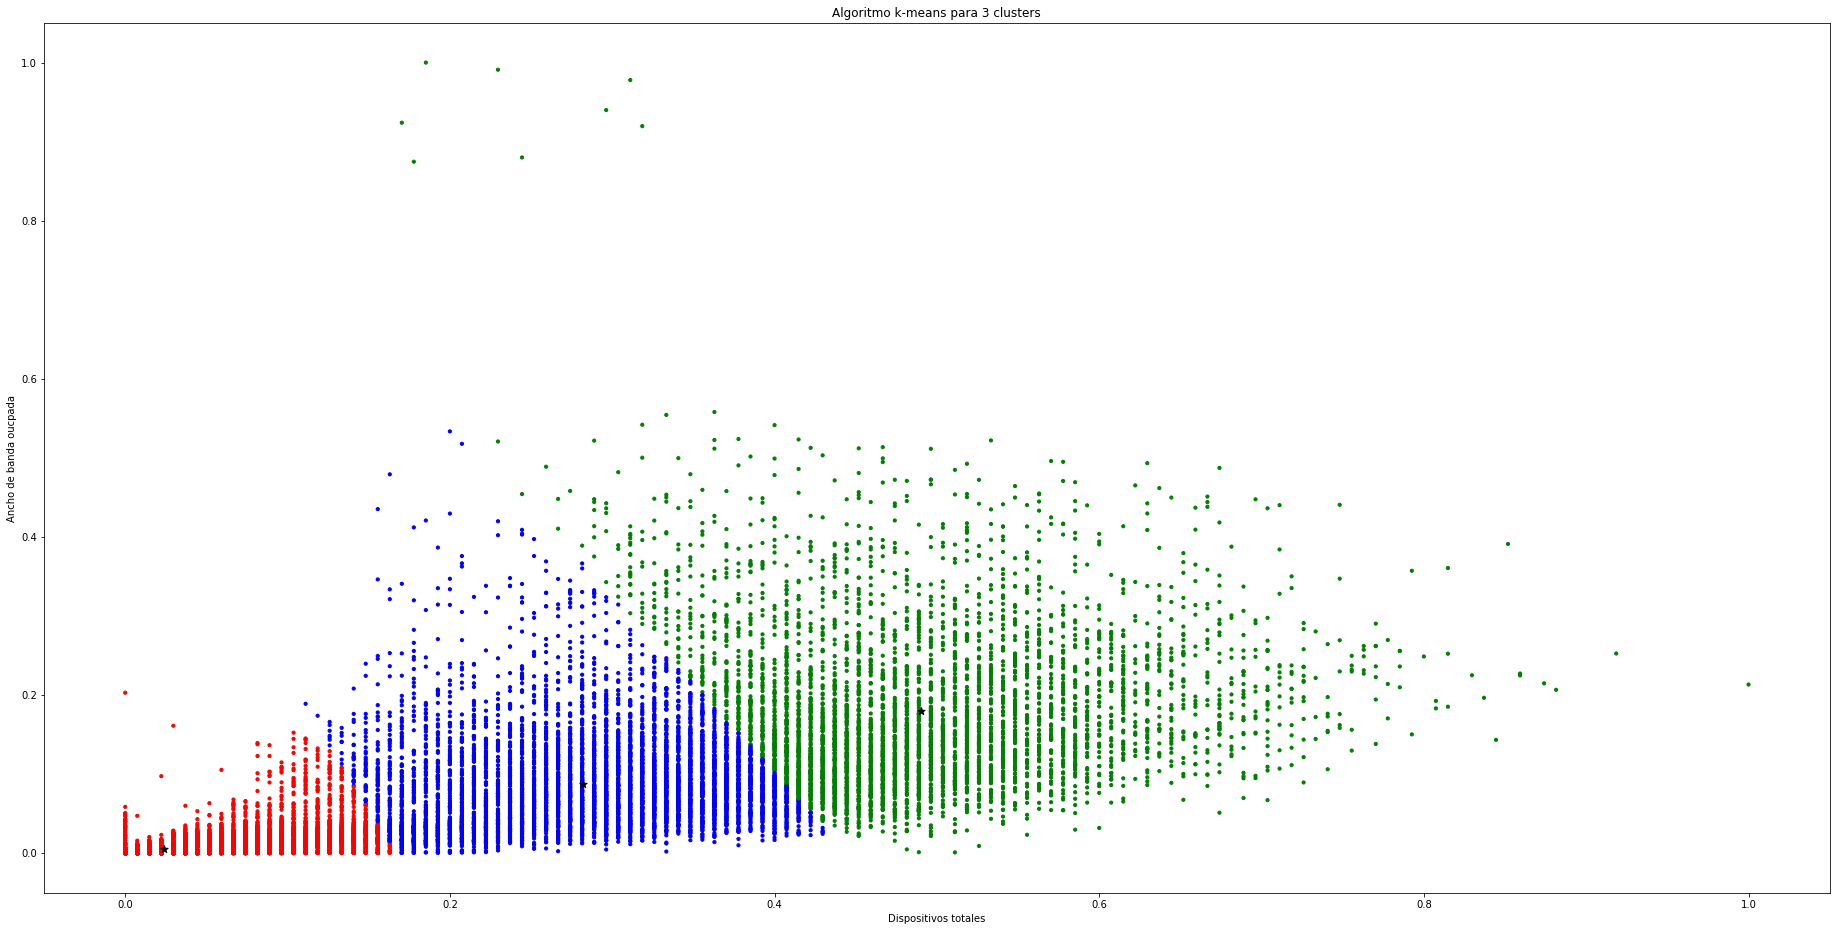

In [12]:
# Asign colors to clusters
colors = ['red', 'green', 'blue', 'yellow'] #Number of colors = k
asign = []
for row in cluster:
    asign.append(colors[row])

# Plot size
plt.figure(figsize=(32,16))

# Plot scatter
plt.scatter(x, y, marker='.', c = asign, s=40)
plt.scatter(centroids[:, 1], centroids[:, 0], marker='*', c='black', s=60)

# Titles of x, y and plot
plt.xlabel('Dispositivos totales')
plt.ylabel('Ancho de banda oucpada')
plt.title('Algoritmo k-means para '+str(k)+' clusters')

# Show plot
plt.show()

### Finding error
* The error: clusters were not located in a central position according to the data

In [13]:
# Print table of data frame
df_normalize

,bw_busy,total_devices
0,0.032525,0.133333
1,0.136314,0.192593
2,0.095992,0.125926
3,0.093556,0.081481
4,0.090267,0.118519
...,...,...
24799,0.144110,0.281481
24800,0.093678,0.274074
24801,0.053478,0.185185
24802,0.071751,0.192593


### Asign the x and y values
* As we can see in the table above the first parameter is 'bw_busy' and the second parameter is 'total_devices'
* When I was asigning x and y:
    * x = df_normalize['total_devices'].values
    * y = df_normalize['bw_busy'].values
* So when I show the centroids they where looking the other way around


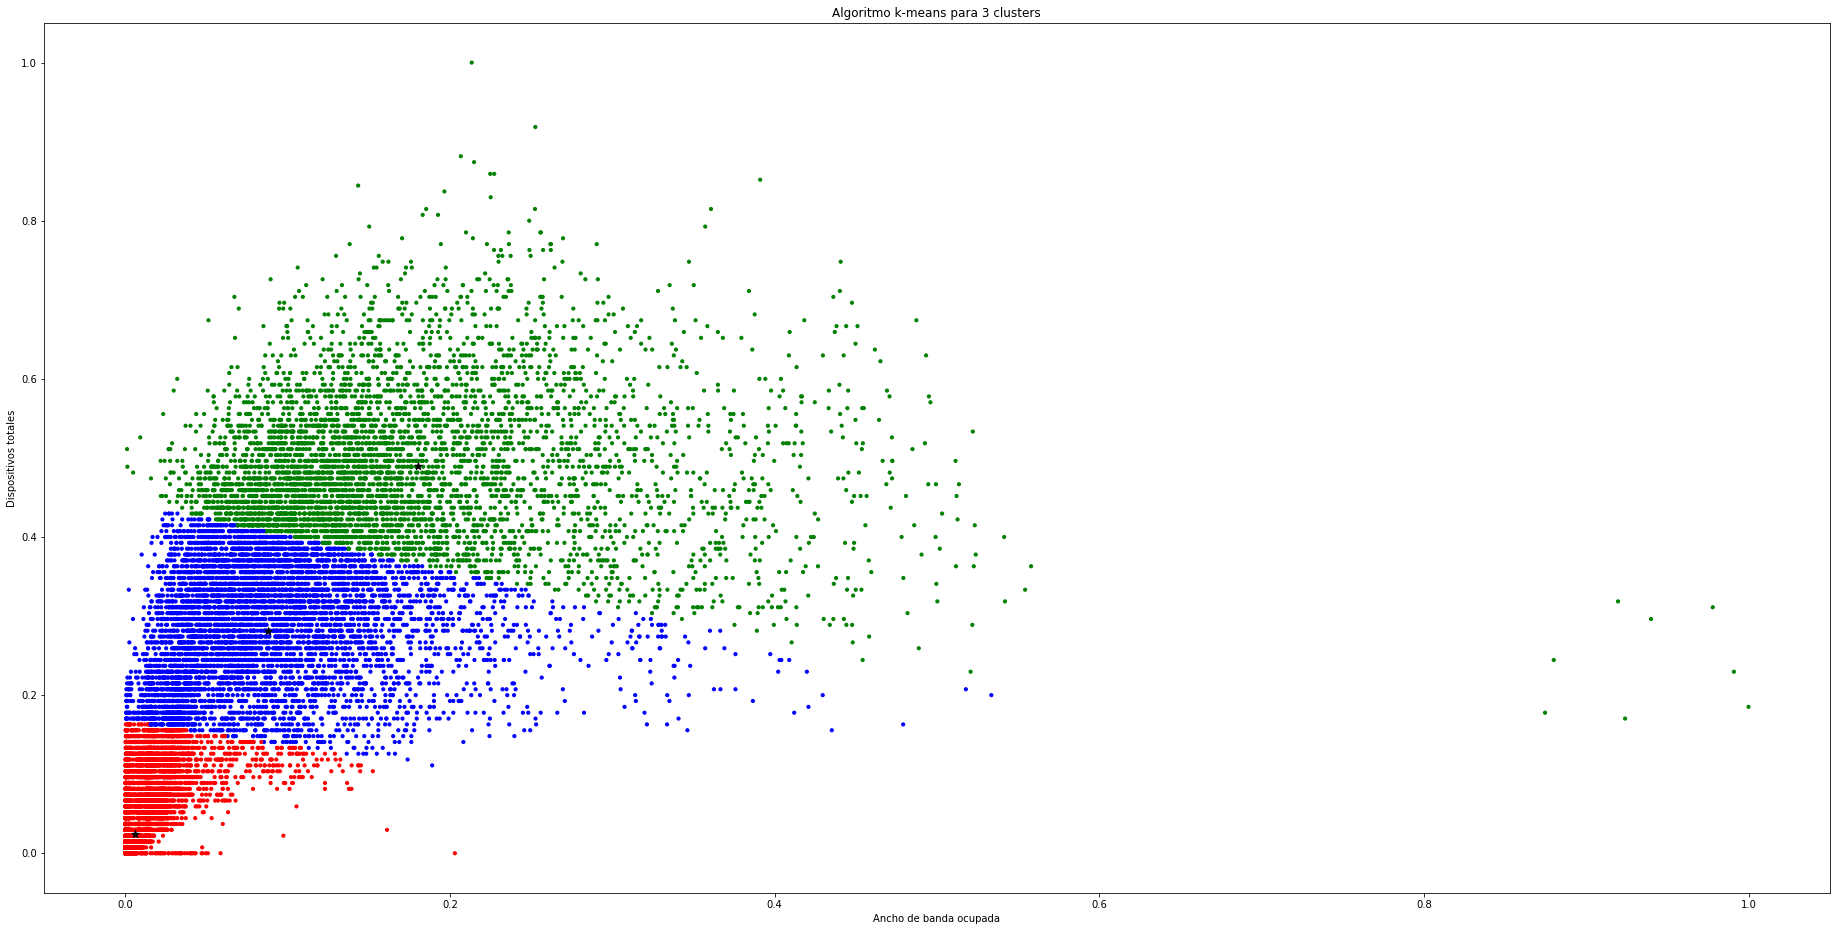

In [14]:
# Change the x and y values
y = df_normalize['total_devices'].values
x = df_normalize['bw_busy'].values

colors = ['red', 'green', 'blue', 'yellow'] #Number of colors = k
asign = []
for row in cluster:
    asign.append(colors[row])

# Plot size
plt.figure(figsize=(32,16))

# Plot scatter
plt.scatter(x, y, marker='.', c = asign, s=40)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=60)

# Titles of x, y and plot
plt.xlabel('Ancho de banda ocupada')
plt.ylabel('Dispositivos totales')
plt.title('Algoritmo k-means para '+str(k)+' clusters')

# Show plot
plt.show()

### Conclusion
* If you want to show the data in the x axis of the FIRST column and the y axis of the SECOND column you show the centroids in the scatter like this: 
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=60)

* If you want to show the data in the x axis of the SECOND column and the y axis of the FIRST column you show the centroids in the scatter like this: 
plt.scatter(centroids[:, 1], centroids[:, 0], marker='*', c='black', s=60)
